In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

#### Seed :

In [2]:
random.seed(23)

### I. Linear Strain

In [3]:
def strain_linear(N):
    final_value = random.uniform(-0.2, 0.2)
    slope       = final_value/N
    return slope * np.array(range(N+1))

def strain_generator(N,n,func):
    gen=[]
    for i in range(n):
        gen.append(func(N))
    return gen

In [4]:
lin_strains=strain_generator(300,50,lambda N : strain_linear(N))

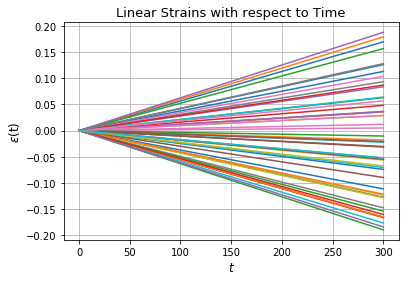

In [5]:
plt.figure()
for el in lin_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Linear Strains with respect to Time',size=13)
plt.show()

### II. Back to Zero (B20) Linear Strain

In [6]:
def B20_strain_linear(N):
    stopping=int(random.uniform(1,N-1))
    init_slope = random.choice([-1,1]) * 0.2/stopping
    new_slope  = (init_slope*stopping)/(stopping-N)
    bias       = -new_slope*N
    arr1       = init_slope*np.array(range(stopping+1))
    arr2       = new_slope*np.array(range(stopping+1,N+1))+bias
    return np.concatenate([arr1,arr2])    

In [7]:
B20_lin_strains=strain_generator(300,50,lambda N : B20_strain_linear(N))

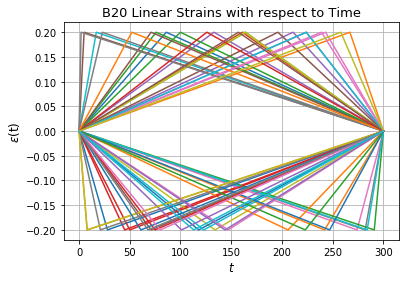

In [8]:
plt.figure()
for el in B20_lin_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('B20 Linear Strains with respect to Time',size=13)
plt.show()

### III. Sinusoidal Strain Functions

#### A) Standard Case

In [9]:
def sin_strain(N):
    num_peak  = int(random.uniform(1,N/10))
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(num_peak*np.pi*disc_time/N)

In [10]:
sin_strains=strain_generator(300,4,lambda N : sin_strain(N))

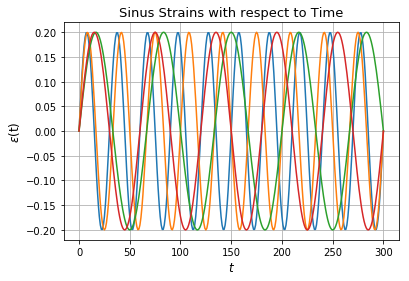

In [11]:
plt.figure()
for el in sin_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Sinus Strains with respect to Time',size=13)
plt.show()

#### B) Sinus Decay

In [12]:
def sin_decay0_strain(N):
    num_peak  = int(random.uniform(1,N/10))
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(num_peak*np.pi*disc_time/N)*(disc_time/N)

In [13]:
sin_decay0_strains=strain_generator(300,4,lambda N : sin_decay0_strain(N))

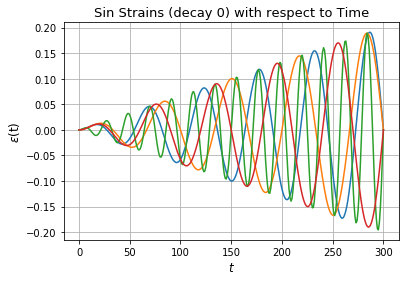

In [14]:
plt.figure()
for el in sin_decay0_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Sin Strains (decay 0) with respect to Time',size=13)
plt.show()

In [15]:
def sin_decay1_strain(N):
    num_peak  = int(random.uniform(1,N/10))
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(num_peak*np.pi*disc_time/N)*((N-disc_time)/N)

In [16]:
sin_decay1_strains=strain_generator(300,4,lambda N : sin_decay1_strain(N))

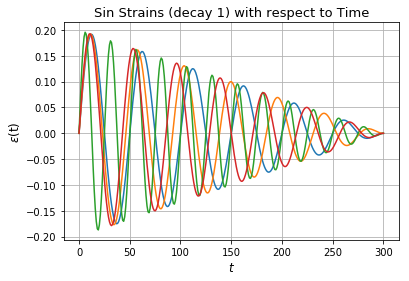

In [17]:
plt.figure()
for el in sin_decay1_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Sin Strains (decay 1) with respect to Time',size=13)
plt.show()

In [18]:
def sin_decay2_strain(N):
    num_peak  = int(random.uniform(1,N/10))
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(num_peak*np.pi*disc_time/N)*np.exp((disc_time)/N-1)

In [19]:
sin_decay2_strains=strain_generator(300,4,lambda N : sin_decay2_strain(N))

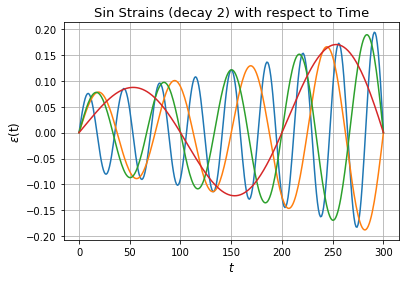

In [20]:
plt.figure()
for el in sin_decay2_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Sin Strains (decay 2) with respect to Time',size=13)
plt.show()

In [21]:
def sin_decay3_strain(N):
    num_peak  = int(random.uniform(1,N/10))
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(num_peak*np.pi*disc_time/N)*np.exp((N-disc_time)/N-1)

In [22]:
sin_decay3_strains=strain_generator(300,5,lambda N : sin_decay3_strain(N))

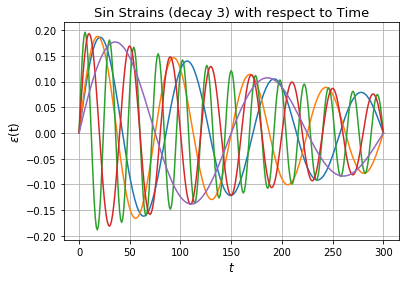

In [23]:
plt.figure()
for el in sin_decay3_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Sin Strains (decay 3) with respect to Time',size=13)
plt.show()

### IV. Probability Strains ;)

In [50]:
from scipy.stats import norm, anglit, maxwell
stat=["norm","anglit","maxwell"]

In [51]:
def prob_strain(N,prob_dist):
    x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), N)
    a = eval(prob_dist+".pdf(x)")
    return random.choice([-1,1])*random.uniform(0,0.2)*(a - min(a))/max(a)

In [52]:
norm_strains=strain_generator(300,10,lambda N : prob_strain(N,"norm"))
anglit_strains=strain_generator(300,10,lambda N : prob_strain(N,"anglit"))
maxwell_strains=strain_generator(300,10,lambda N : prob_strain(N,"maxwell"))

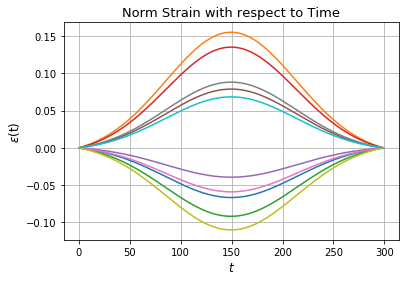

In [54]:
plt.figure()
for el in norm_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Norm Strain with respect to Time',size=13)
plt.show()

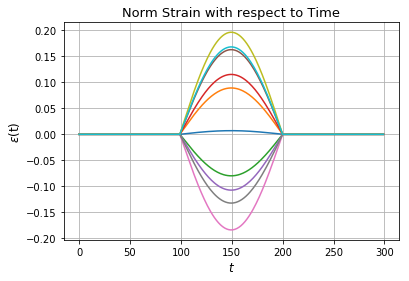

In [55]:
plt.figure()
for el in anglit_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Anglit Strain with respect to Time',size=13)
plt.show()

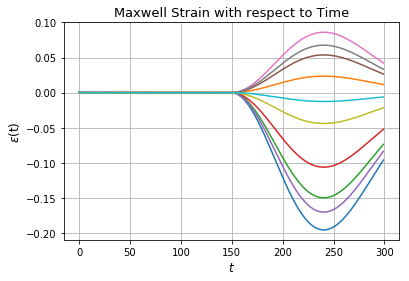

In [58]:
plt.figure()
for el in maxwell_strains:
    plt.plot(el)
plt.grid(True)
plt.ylabel(r'$\epsilon$(t)',size=12)
plt.xlabel(r'$t$',size=12)
plt.title('Maxwell Strain with respect to Time',size=13)
plt.show()